<h1>Cardiovascular Disease Dataset EDA</h1>

Cardiovascular diseases (CVDs) are a leading cause of mortality worldwide, motivating data-driven approaches that support early identification of high-risk individuals. In this notebook, we perform exploratory data analysis (EDA) on a CVD dataset to summarize cohort characteristics, inspect feature distributions, and examine relationships among clinical and lifestyle variables as a foundation for risk modeling. 

<h2>Importing dataset and features of the data</h2>

In [34]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid',{'axes.grid':True, 'grid.color':'gray','grid.alpha':0.7})

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

plt.rcParams.update({
    'axes.titlesize':20,
    'axes.titleweight':'bold',
    'axes.labelsize':18,
    'axes.labelweight':'bold',
    'xtick.labelsize':14,
    'ytick.labelsize':14,
    'legend.fontsize':16
})

def style_axes(ax):
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(2)
    ax.tick_params(axis='both',which='major',length=8,width=2,colors='black')

print('Import and setup complete')

Import and setup complete


In [35]:
df= pd.read_csv('/kaggle/input/cardiovascular-disease-risk-assessment-dataset/CVD Dataset.csv', encoding='ascii', delimiter=',')

print('Dataset loaded. shape:',df.shape)
df.head(3)

Dataset loaded. shape: (1529, 22)


,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,...,Low,N,171.0,0.504,125.0,79.0,Elevated,140.0,17.93,INTERMEDIARY
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,...,High,Y,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51,HIGH
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,...,High,Y,183.0,0.583,104.0,77.0,Normal,0.0,12.64,INTERMEDIARY


In [36]:
#Converting column name to remove extra sppace if needed
df.columns = [col.strip() for col in df.columns]
print(df.columns)

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'Height (cm)',
       'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score',
       'CVD Risk Level'],
      dtype='object')


In [37]:
#Descriptive statistics for numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1451.0,47.025500,12.421063,25.000,37.000,46.0000,55.00000,79.000
Weight (kg),1448.0,85.917427,21.012580,50.100,67.050,86.6145,105.00000,120.000
Height (m),1462.0,1.754111,0.113090,1.502,1.660,1.7550,1.84550,2.000
BMI,1465.0,28.465997,7.038685,15.000,22.629,28.1590,34.00000,46.200
Abdominal Circumference (cm),1462.0,91.773214,12.823573,70.000,80.500,91.6000,102.26900,119.996
Total Cholesterol (mg/dL),1456.0,198.539148,57.794099,100.000,150.000,197.0000,249.00000,300.000
HDL (mg/dL),1449.0,56.197378,16.066754,30.000,42.000,56.0000,70.00000,89.000
Fasting Blood Sugar (mg/dL),1462.0,117.485636,30.289174,70.000,92.000,115.0000,138.00000,198.000
Height (cm),1455.0,175.390600,11.251527,150.000,166.000,175.6940,184.20850,199.960
Waist-to-Height Ratio,1450.0,0.525727,0.081213,0.360,0.460,0.5220,0.58375,0.787


In [38]:
#Dataset structure and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [39]:
#Checking missing vlaues
df.isnull().sum()

Sex                              0
Age                             78
Weight (kg)                     81
Height (m)                      67
BMI                             64
Abdominal Circumference (cm)    67
Blood Pressure (mmHg)            0
Total Cholesterol (mg/dL)       73
HDL (mg/dL)                     80
Fasting Blood Sugar (mg/dL)     67
Smoking Status                   0
Diabetes Status                  0
Physical Activity Level          0
Family History of CVD            0
Height (cm)                     74
Waist-to-Height Ratio           79
Systolic BP                     71
Diastolic BP                    82
Blood Pressure Category          0
Estimated LDL (mg/dL)           69
CVD Risk Score                  70
CVD Risk Level                   0
dtype: int64

<h2>Histogram of age distribution</h2>

plt.figure(figsize=(10,6))

ax=sns.histplot(df["Age"],kde=True,color = "skyblue",edgecolor='black',linewidth=2)
ax.set_title('Age distribution',fontsize=28,fontweight='bold',color='black')
ax.set_xlabel('Age', fontsize=18,fontweight='bold',color='black')
ax.set_ylabel('Frequency', fontsize=18,fontweight='bold',color='black')
style_axes(ax)
plt.tight_layout()
plt.show()
    

<h2>Box plot: BMI Across Sex</h2>

Analysing body mass differences across sexes using box plot

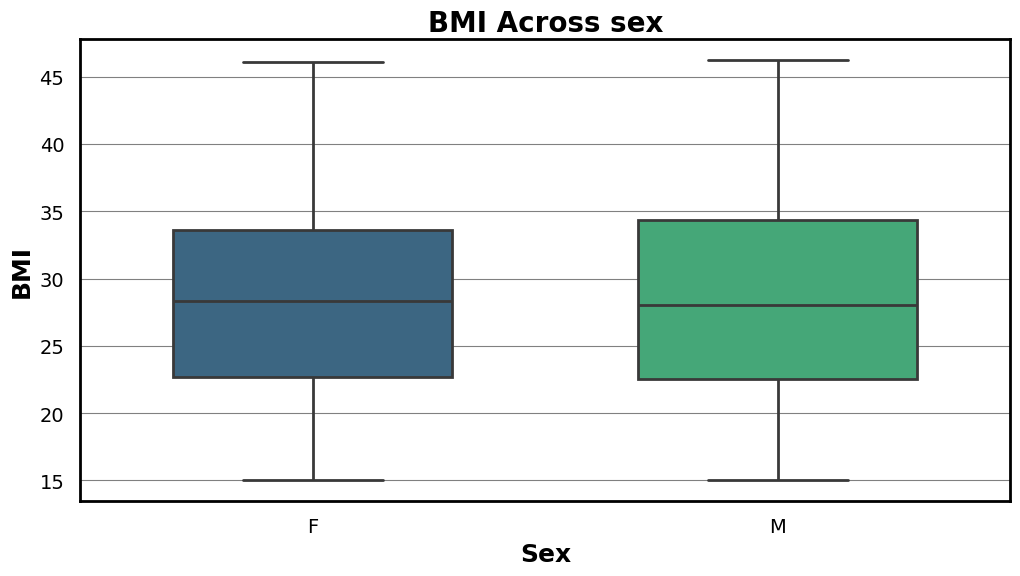

In [45]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(data=df, x='Sex', y='BMI', palette='viridis', width=0.6,linewidth=2)
ax.set_title('BMI Across sex', fontsize=20, fontweight='bold',color='black')
ax.set_xlabel('Sex',fontsize=18, fontweight='bold',color='black')
ax.set_ylabel('BMI',fontsize=18, fontweight='bold',color='black')
style_axes(ax)